<a href="https://colab.research.google.com/github/kaljuvee/datascience/blob/master/notebooks/stats/timeseries/sales_autoarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.5MB 4.4MB/s 
     |████████████████████████████████| 2.1MB 39.5MB/s 
     |████████████████████████████████| 8.7MB 33.0MB/s 
  Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


**Auto ARIMA Forecasting on Univariate Data**

**Background**

The components you might observe in the time-series analysis are Trend, Seasonal, Irregular, and Cyclicity. In the basic ARIMA model, we need to provide the p,d, and q values which are essential. We use statistical techniques to generate these values by performing the difference to eliminate the non-stationarity and plotting ACF and PACF graphs. In Auto ARIMA, the model itself will generate the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

**Steps**
1. **Prepare and Explore Data**- read data, reset the index and explore any patterns
2. **Test for Stationarity** - test for stationarity with Augmented Dickey-Fuller Test
3. **Train and Split** - split the data set into test and train
4. **Build Model** - build auto ARIMA model
8. **Forecast** - forecast on test data

**References**
* [pmdarima package](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)

**1. Prepare and Explore Data**

In [18]:
import pandas as pd
from pmdarima.arima import auto_arima

df = pd.read_csv('https://raw.githubusercontent.com/kaljuvee/datascience/master/notebooks/stats/timeseries/data/sample-seasonal-data.csv', sep=',')
df.head()

,month,sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


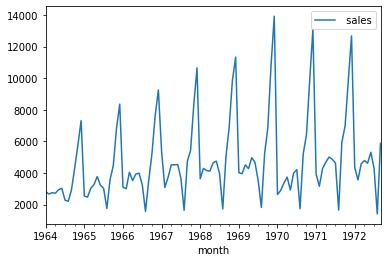

In [19]:
# convert to date time and set index
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)
df.plot()

**2. Test for Stationarity**

In [20]:
# seasonality test with Augmented Dickey Fuller Test
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

Conclude that the data is non-stationary (alpha < 0.05). Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model.

**3. Test and Split**

In [21]:
df.shape

(105, 1)

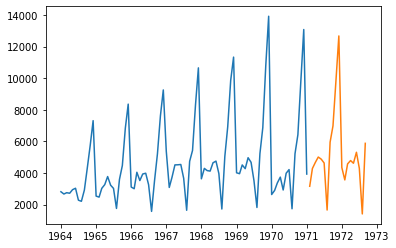

In [23]:
import matplotlib.pyplot as plt

train_df = df[:85]
test_df = df[-20:]
plt.plot(train_df)
plt.plot(test_df)

**4. Build ARIMA Model**

**Model Overview:**

* **Auto-Regressive (p)** - number of autoregressive terms.
* **Integrated (d)**- number of nonseasonal differences needed for stationarity.
* **Moving Average (q)**- number of lagged forecast errors in the prediction equation.

In the Auto ARIMA model, note that small p,d,q values represent non-seasonal components, and capital P, D, Q represent seasonal components. It works similarly like hyper tuning techniques to find the optimal value of p, d, and q with different combinations and the final values would be determined with the lower AIC, BIC parameters taking into consideration.
Here, we are trying with the p, d, q values ranging from 0 to 5 to get better optimal values from the model. There are many other parameters in this model 

In [25]:
# start_p = 0
arima_model = auto_arima(train_df, start_p = 0, d = 1, start_q = 0, max_p = 5, max_d = 5, max_q = 5, start_P = 0, D = 1, start_Q = 0, max_P = 5, max_D = 5, max_Q = 5, m = 12, seasonal=True, error_action = 'warn', trace = True, supress_warnings=True, stepwise = True, random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1205.819, BIC=1210.373, Time=0.056 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1194.062, BIC=1203.169, Time=0.203 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1174.299, BIC=1183.405, Time=1.037 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1203.853, BIC=1206.129, Time=0.027 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=1196.741, BIC=1203.571, Time=0.059 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=1194.271, BIC=1205.654, Time=1.378 seconds
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=1194.846, BIC=1206.230, Time=0.897 seconds
Fit ARIMA(1,1,0)x(0,1,1,12) [intercept=True]; AIC=1194.977, BIC=1204.084, Time=0.501 seconds
Fit ARIMA(1,1,0)x(2,1,1,12) [intercept=True]; AIC=119

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,0)x(2,1,1,12) [intercept=True]; AIC=1185.896, BIC=1201.832, Time=4.747 seconds
Fit ARIMA(2,1,0)x(1,1,1,12) [intercept=True]; AIC=1189.544, BIC=1203.204, Time=1.501 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,0)x(3,1,1,12) [intercept=True]; AIC=1190.037, BIC=1208.251, Time=7.572 seconds
Near non-invertible roots for order (2, 1, 0)(3, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,0)x(2,1,2,12) [intercept=True]; AIC=1184.980, BIC=1203.194, Time=4.747 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(2,1,0)x(1,1,2,12) [intercept=True]; AIC=1180.249, BIC=1196.186, Time=3.523 seconds
Fit ARIMA(2,1,0)x(0,1,2,12) [intercept=True]; AIC=1189.001, BIC=1202.661, Time=0.593 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,0)x(1,1,3,12) [intercept=True]; AIC=1184.892, BIC=1203.106, Time=6.859 seconds
Fit ARIMA(2,1,0)x(0,1,1,12) [intercept=True]; AIC=1189.512, BIC=1200.895, Time=0.239 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(2,1,0)x(0,1,3,12) [intercept=True]; AIC=1187.869, BIC=1203.806, Time=4.544 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 3, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,0)x(2,1,3,12) [intercept=True]; AIC=1184.877, BIC=1205.367, Time=8.144 seconds
Near non-invertible roots for order (2, 1, 0)(2, 1, 3, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(1,1,0)x(1,1,2,12) [intercept=True]; AIC=1184.164, BIC=1197.824, Time=3.591 seconds
Near non-invertible roots for order (1, 1, 0)(1, 1, 2, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(3,1,0)x(1,1,2,12) [intercept=True]; AIC=1179.662, BIC=1197.875, Time=4.114 seconds
Fit ARIMA(3,1,0)x(0,1,2,12) [intercept=True]; AIC=1189.659, BIC=1205.595, Time=0.642 seconds
Fit ARIMA(3,1,0)x(1,1,1,12) [intercept=True]; AIC=1190.251, BIC=1206.187, Time=1.508 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,0)x(2,1,2,12) [intercept=True]; AIC=1183.563, BIC=1204.053, Time=4.831 seconds
Near non-invertible roots for order (3, 1, 0)(2, 1, 2, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,0)x(1,1,3,12) [intercept=True]; AIC=1182.722, BIC=1203.212, Time=7.491 seconds
Near non-invertible roots for order (3, 1, 0)(1, 1, 3, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.992)
Fit ARIMA(3,1,0)x(0,1,1,12) [intercept=True]; AIC=1190.236, BIC=1203.896, Time=0.248 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,0)x(0,1,3,12) [intercept=True]; AIC=1187.801, BIC=1206.014, Time=6.958 seconds
Near non-invertible roots for order (3, 1, 0)(0, 1, 3, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(3,1,0)x(2,1,1,12) [intercept=True]; AIC=1186.322, BIC=1204.535, Time=4.667 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,0)x(2,1,3,12) [intercept=True]; AIC=1182.679, BIC=1205.446, Time=9.169 seconds
Near non-invertible roots for order (3, 1, 0)(2, 1, 3, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(4,1,0)x(1,1,2,12) [intercept=True]; AIC=1183.113, BIC=1203.603, Time=5.031 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,1)x(1,1,2,12) [intercept=True]; AIC=1170.315, BIC=1190.805, Time=5.312 seconds
Near non-invertible roots for order (3, 1, 1)(1, 1, 2, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(2,1,1)x(1,1,2,12) [intercept=True]; AIC=1172.080, BIC=1190.293, Time=5.300 seconds
Near non-invertible roots for order (2, 1, 1)(1, 1, 2, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(4,1,1)x(1,1,2,12) [intercept=True]; AIC=1182.659, BIC=1205.426, Time=5.975 seconds
Total fit time: 119.279 seconds


In [26]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   85
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -576.157
Date:                                 Fri, 26 Jun 2020   AIC                           1170.315
Time:                                         22:06:42   BIC                           1190.805
Sample:                                              0   HQIC                          1178.472
                                                  - 85                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.1672      1.748     -0.668      0.504      -4.593       2.259
ar.L1          0.3402      0.102      3.325      0.001       0.140       0.541
ar.L2         -0.0347      0.134     -0.259      0.796      -0.297       0.228
ar.L3          0.0124      0.147      0.084      0.933      -0.275       0.300
ma.L1         -1.0000      0.284     -3.521      0.000      -1.557      -0.443
ar.S.L12       0.8193      0.280      2.924      0.003       0.270       1.368
ma.S.L12      -1.2131      0.420     -2.887      0.004      -2.037      -0.389
ma.S.L24       0.5220      0.174      2.997      0.003       0.181       0.863
sigma2      4.599e+05   6.15e-07   7.47e+11      0.000     4.6e+05     4.6e+05
===================================================================================
Ljung-Box (Q):                       47.91   Jarque-Bera (JB):                 6.93
Prob(Q):                              0.18   Prob(JB):                         0.03
Heteroskedasticity (H):               1.80   Skew:                            -0.12
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+29. Standard errors may be unstable.
"""

**5. Forecast on Test Data**

In [28]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20), index = test_df.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
month,
1971-02-01,3649.495348
1971-03-01,3781.221860
1971-04-01,3890.412722
1971-05-01,3682.161638
1971-06-01,4260.896352
1971-07-01,3848.843045
1971-08-01,1362.412861
1971-09-01,5304.096645
1971-10-01,6812.509440


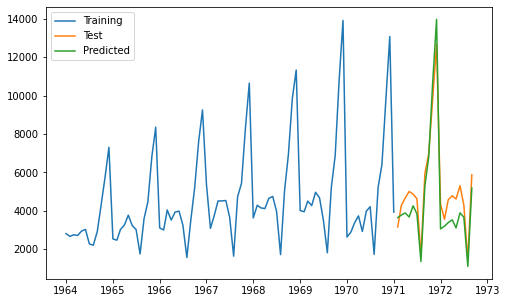

In [33]:
plt.figure(figsize=(8,5))
plt.plot(train_df, label = 'Training')
plt.plot(test_df, label = 'Test')
plt.plot(prediction, label = 'Predicted')
plt.legend(loc = 'upper left')
plt.show()

In [43]:
# show some goodness of fit metrics
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
test_df['predicted_sales'] = prediction
#r2_score(test_df['sales'], test_df['predicted_sales'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
